In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.special import ellipe
from scipy.special import ellipk

#parameters for Galaxy NGC 5533
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
h = 8.9                                                     #radial scale-length (kpc)
rho00 = 0.31e9                                              #central 3D density (solar mass/kpc^3) 
epsdisk = 5.0                                               #mass-to-light ratio (R-band solar mass/solar lum)
absmag = -22.02                                             #absolute magnitude 
magsun = 4.42                                               #absolute magnitude of the sun

z0 = 0.2*h                                                  #half-thickness (kpc)
R = 4*h                                                     #cut-off radius (kpc)
d = 0.2*h                                                   #cut-off length upper limits (kpc)
                                             
#definitions
x = lambda r,u,xi: ((r**2)+(u**2)+(xi**2))/(2*r*u)

px = lambda r,u,xi: x(r,u,xi)-(np.sqrt((x(r,u,xi)**2)-1))

#rho00 = mu0/(2*z0)

print(px(1,1,0))
print(R+d)
print(z0)
print(R)
print(d)

1.0
37.38
1.7800000000000002
35.6
1.7800000000000002


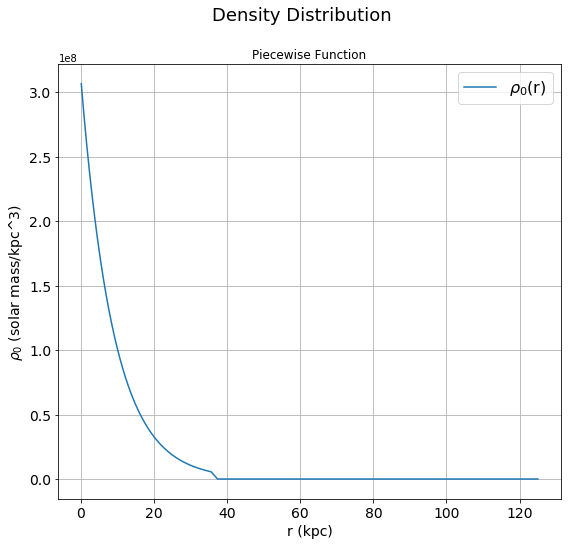

5678486.051805091
5674658.253229229
0.0


In [2]:
#density piecewise function
def rho0(r, R, h, d):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: rho00*np.exp(-r/h), lambda r: rho00*np.exp(-R/h)*(1-((r-R)/d)), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

ra = np.linspace(0.1, 125, 500)

#plotting piecewise function
fig = plt.figure(figsize=(9.0,8.0))                
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, rho0(ra, R, h, d), linestyle='solid', label='$\\rho_0$(r)')          

plt.axis('tight');                                 

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function')              
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('$\\rho_0$ (solar mass/kpc^3)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                  
plt.show()

print(rho0(35.599, R, h, d))
print(rho0(35.601, R, h, d))
print(rho0(37.381, R, h, d))

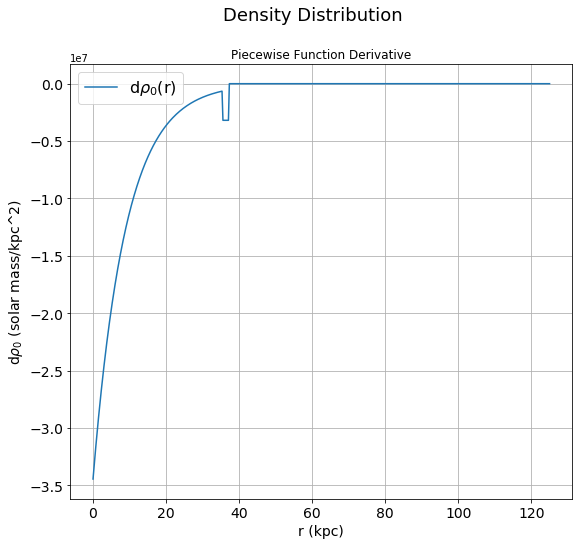

-638032.1406522574
-3189802.278375053
0.0


In [3]:
#partial derivative of rho(u,xi)
def durho0(r, R, h, d):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: -(1/h)*rho00*np.exp(-r/h), lambda r: -(1/d)*rho00*np.exp(-R/h), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

#plotting piecewise function derivative
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, durho0(ra, R, h, d), linestyle='solid', label='d$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel ('d$\\rho_0$ (solar mass/kpc^2)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(durho0(35.599, R, h, d))
print(durho0(35.601, R, h, d))
print(durho0(37.381, R, h, d))

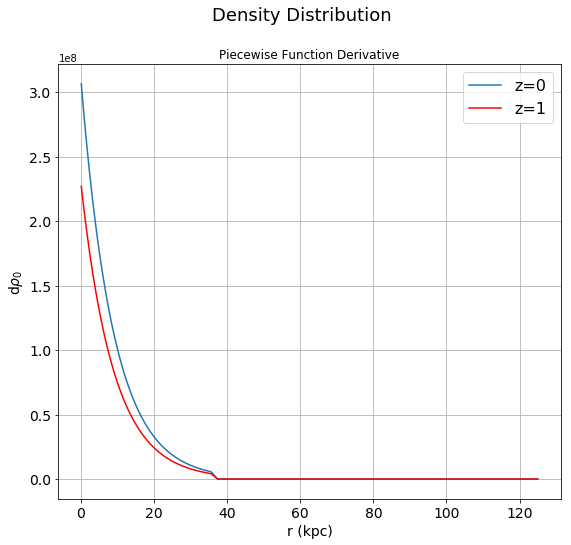

5678486.051805091
0.0
-638032.1406522574
0.0


In [4]:
#disk density distribution
rho_rz = lambda r,z: rho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))
drho_rz = lambda r,z: durho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

#plotting disk density distribution
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, rho_rz(ra,0), linestyle='solid', label='z=0')          
plt.plot(ra, rho_rz(ra,1), linestyle='solid', label='z=1', color='r')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('d$\\rho_0$', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(rho_rz(35.599,0))
print(rho_rz(37.381,0))
print(drho_rz(35.599,0))
print(drho_rz(37.381,0))

85627549.80849361


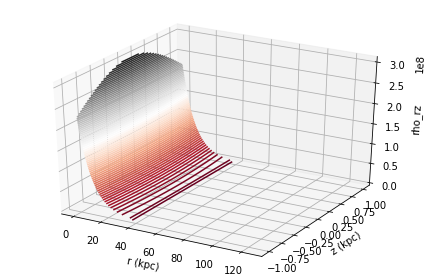

In [5]:
#plotting disk density distribution in 3D
from mpl_toolkits import mplot3d

def rho_rz2(r, z):
    return rho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

za = np.linspace(-1, 1, 500)

RA, ZA = np.meshgrid(ra, za)
RZ = rho_rz2(RA, ZA)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RA, ZA, RZ, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('rho_rz');

print(rho_rz2(2,2))

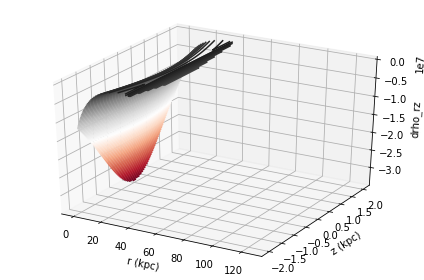

In [6]:
#plotting derivative of disk density distribution in 3D
def drho_rz2(r, z):
    return durho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

zb = np.linspace(-2, 2, 500)

RB, ZB = np.meshgrid(ra, zb)
RZB = drho_rz2(RB, ZB)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RB, ZB, RZB, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('drho_rz');

In [7]:
#complete elliptic integral
K = lambda r,u,xi: ellipk(px(r,u,xi))-ellipe(px(r,u,xi))

print(K(1,1,1))

0.35734399698214614


-8486222.452085793


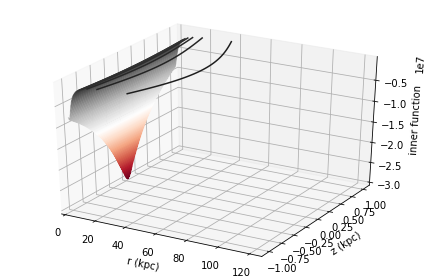

In [8]:
#inner function
f = lambda r,u,z: drho_rz(u,z)*2*np.sqrt(u)*K(r,u,z)/(np.pi*np.sqrt(r*px(r,u,z)))

#plot inner function 3D
def f2(r, u, z):
    return drho_rz(u,z)*2*np.sqrt(u)*K(r,u,z)/(np.pi*np.sqrt(r*px(r,u,z)))

RC, ZC = np.meshgrid(ra, za)
RZC = f2(RC, 1, ZC)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RC, ZC, RZC, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlim(0,125)
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('inner function');

print(f(1,1,1))

In [9]:
#integrate function
f3 = lambda z,r,u: f(r,u,z)
intf = lambda r,u: quad(f3, 0, np.inf, args=(r,u,))[0]

print(intf(1,1))

-25163286.69048213


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#integrate outer function
intf3 = lambda u,r: intf(r,u)
intintf = lambda r: quad(intf3, 0.1, 125, args=(r,))[0]

print(intintf(10))

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


-238575961.9997914


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [11]:
#absolute magnitude to luminosity
L0 = np.power(10, (0.4*(magsun-absmag)))
#L = lambda r,z: L0*np.exp(-r/h)*np.power(np.cosh((z/z0), (-2)))

#mass of disk
rho_rz_r = lambda z,r: rho_rz(r,z)*r

Mintrho = lambda r: quad(rho_rz_r, -2, 2, args=(r,))[0]

Mintintrho = quad(Mintrho, 0, 125)[0]

#epsdisk = Mintintrho/L0
#pref = epsdisk*(L/Mintintrho)

#multiplying by epsylon
F = lambda r: 4*np.pi*G*intintf(r)

#print(epsdisk)
#print(L0)
#print(L(125,2))
#print(pref)
print(Mintintrho)
print(F(10))

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


64755298549.198456
-12891.546020116593


In [14]:
#radial force function
#F = lambda r: 4*np.pi*G*intintf(r)
#print(F(1))

#disk velocity
rd = np.linspace(0.1, 125, num=100)
Fv = np.vectorize(F)
v = np.sqrt(-rd*Fv(rd))


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


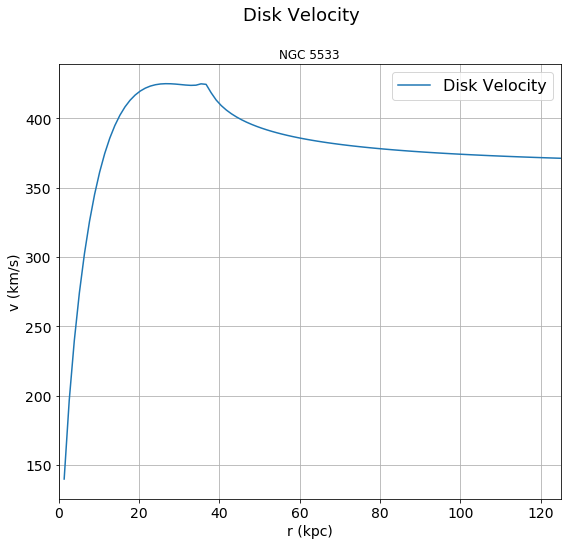

In [15]:
#plot disk velocity
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(rd, v, linestyle='solid', label='Disk Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Disk Velocity', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,125)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.savefig('DiskVelocity100pts.png')
plt.show()

In [16]:
print(rd,v)

[1.00000000e-01 1.36161616e+00 2.62323232e+00 3.88484848e+00
 5.14646465e+00 6.40808081e+00 7.66969697e+00 8.93131313e+00
 1.01929293e+01 1.14545455e+01 1.27161616e+01 1.39777778e+01
 1.52393939e+01 1.65010101e+01 1.77626263e+01 1.90242424e+01
 2.02858586e+01 2.15474747e+01 2.28090909e+01 2.40707071e+01
 2.53323232e+01 2.65939394e+01 2.78555556e+01 2.91171717e+01
 3.03787879e+01 3.16404040e+01 3.29020202e+01 3.41636364e+01
 3.54252525e+01 3.66868687e+01 3.79484848e+01 3.92101010e+01
 4.04717172e+01 4.17333333e+01 4.29949495e+01 4.42565657e+01
 4.55181818e+01 4.67797980e+01 4.80414141e+01 4.93030303e+01
 5.05646465e+01 5.18262626e+01 5.30878788e+01 5.43494949e+01
 5.56111111e+01 5.68727273e+01 5.81343434e+01 5.93959596e+01
 6.06575758e+01 6.19191919e+01 6.31808081e+01 6.44424242e+01
 6.57040404e+01 6.69656566e+01 6.82272727e+01 6.94888889e+01
 7.07505051e+01 7.20121212e+01 7.32737374e+01 7.45353535e+01
 7.57969697e+01 7.70585859e+01 7.83202020e+01 7.95818182e+01
 8.08434343e+01 8.210505